In [2]:
import pandas as pd
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [3]:
df = df[df['is_canceled'] == 0]

In [4]:
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_month_num'] = df['arrival_date_month'].map(month_order)

In [15]:
df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119389     96.14
119390    225.43
119391    157.71
119392    104.40
119393    151.20
Name: adr, Length: 75163, dtype: float64

In [12]:
df['arrival_date_month']

0           July
1           July
2           July
3           July
4           July
           ...  
119389    August
119390    August
119391    August
119392    August
119393    August
Name: arrival_date_month, Length: 75163, dtype: object

In [11]:
df['arrival_month_num']

0         7.0
1         7.0
2         7.0
3         7.0
4         7.0
         ... 
119389    8.0
119390    8.0
119391    8.0
119392    8.0
119393    8.0
Name: arrival_month_num, Length: 75163, dtype: float64

In [5]:
df_cleaned = df.dropna(subset=['adr', 'arrival_date_month', 'customer_type', 'hotel'])

In [6]:
grouped_adr_hotel = (
    df_cleaned
    .groupby(['hotel', 'customer_type', 'arrival_month_num'])['adr']
    .mean()
    .reset_index()
)

In [7]:
inv_month_order = {v: k for k, v in month_order.items()}

In [8]:
grouped_adr_hotel['arrival_date_month'] = grouped_adr_hotel['arrival_month_num'].map(inv_month_order)

grouped_adr_hotel = grouped_adr_hotel.sort_values(by=['hotel', 'arrival_month_num'])

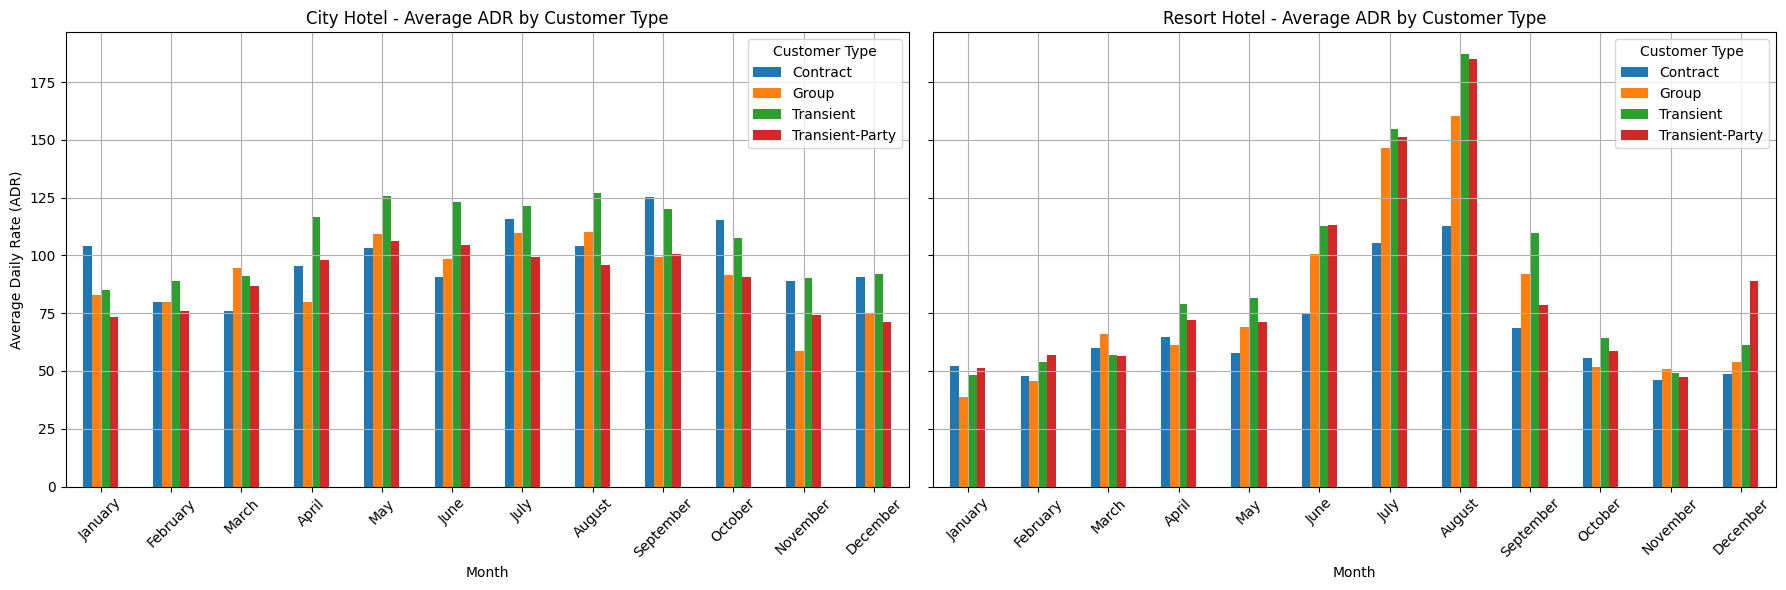

Text(0.5, 0.98, 'Final Graph – Average Daily Rate by Customer Type and Month (City vs Resort Hotel)')

In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

hotels = grouped_adr_hotel['hotel'].unique()
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

for ax, hotel in zip(axes, hotels):
    data = grouped_adr_hotel[grouped_adr_hotel['hotel'] == hotel]
    
    pivot = data.pivot(index='arrival_month_num', columns='customer_type', values='adr')
    pivot.plot(kind='bar', ax=ax)
    
    ax.set_title(f"{hotel} - Average ADR by Customer Type")
    ax.set_xlabel("Month")
    ax.set_ylabel("Average Daily Rate (ADR)")
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels(month_labels, rotation=45)
    ax.legend(title="Customer Type")
    ax.grid(True)

plt.tight_layout()
plt.show()
fig.suptitle("Final Graph – Average Daily Rate by Customer Type and Month (City vs Resort Hotel)", fontsize=20)



### Mini Report

The graph in the cell above is for the final visualisation, please refer to it while reading the report.

**Business Question**  
How does the average daily rate (ADR) vary across months and customer types between City and Resort hotels?

**Relevance**  
ADR is a key revenue metric in the hotel industry. Comparing how it varies by season and customer type across different hotel types helps hotel managers tailor pricing, allocate resources, and develop targeted marketing strategies specific to each location.

**Data Justification**  
This analysis uses the `adr` (average daily rate), `arrival_date_month`, and `customer_type` columns to capture revenue patterns by guest type and season. The inclusion of the `hotel` column allows a comparison between City and Resort hotels. Cancelled bookings were excluded from the analysis so the graphs only reflect actual revenue-generating stays.

**Findings and Insights**  
The graph above (final graph before this markdown cell) shows distinct differences between hotel types. Resort Hotels show a dramatic ADR increases in July and August, especially among Transient and Group customers, while City Hotels show more stable rates throughout the year. Transient customers consistently generate higher ADRs in both hotel types, highlighting them as a high-value segment. These insights can support seasonal pricing adjustments and customer-specific marketing plans.
